In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0.0,1.00000,NaN,0.93035,-0.36156,-0.10868,NaN,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0.0,1.00000,-0.02401,NaN,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,NaN,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,NaN,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,NaN,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,NaN,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,NaN,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,NaN,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	18
float64		column 2	37
float64		column 3	36
float64		column 4	36
float64		column 5	18
float64		column 6	0
float64		column 7	0
float64		column 8	18
float64		column 9	0
float64		column 10	0
float64		column 11	18
float64		column 12	19
float64		column 13	19
float64		column 14	0
float64		column 15	18
float64		column 16	55
float64		column 17	36
float64		column 18	36
float64		column 19	19
float64		column 20	19
float64		column 21	0
float64		column 22	19
float64		column 23	0
float64		column 24	0
float64		column 25	0
float64		column 26	36
float64		column 27	18
float64		column 28	0
float64		column 29	55
float64		column 30	18
float64		column 31	0
float64		column 32	36
float64		column 33	0
float64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,333.000000,314.0,315.000000,315.000000,333.000000,351.000000,351.000000,333.000000,351.000000,351.000000,...,351.000000,315.000000,333.000000,351.000000,296.000000,333.000000,351.000000,315.000000,351.000000,351.000000
mean,0.891892,0.0,0.659162,0.039473,0.612830,0.115889,0.550095,0.140378,0.511848,0.181345,...,0.396135,-0.076469,0.543557,-0.069538,0.394480,-0.012819,0.352514,-0.004789,0.349364,0.014480
std,0.310984,0.0,0.479059,0.419643,0.495864,0.460810,0.492654,0.499199,0.507066,0.483851,...,0.578451,0.491937,0.507399,0.550025,0.543610,0.501498,0.571483,0.496258,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.499350,-0.060355,0.423280,-0.024795,0.211310,-0.041820,0.087110,-0.048075,...,0.000000,-0.294755,0.304060,-0.443165,0.000195,-0.219010,0.000000,-0.226500,0.000000,-0.165350
50%,1.000000,0.0,0.877720,0.008920,0.804860,0.022800,0.728730,0.016040,0.684210,0.018290,...,0.553890,-0.015050,0.698450,-0.017690,0.479940,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.164310,1.000000,0.334655,0.969240,0.457470,0.953240,0.534195,...,0.905240,0.146665,0.985560,0.153535,0.887798,0.174760,0.857620,0.167305,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

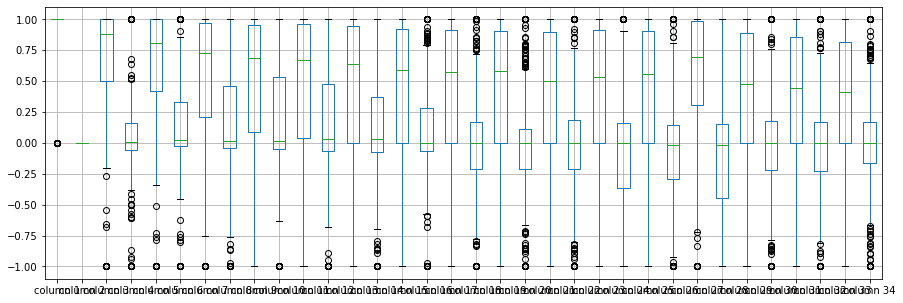

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891892
column 2     0.000000
column 3     0.659162
column 4     0.039473
column 5     0.612830
column 6     0.115889
column 7     0.550095
column 8     0.140378
column 9     0.511848
column 10    0.181345
column 11    0.482629
column 12    0.158422
column 13    0.406443
column 14    0.093414
column 15    0.348990
column 16    0.067626
column 17    0.371272
column 18   -0.000571
column 19    0.374324
column 20   -0.018982
column 21    0.336695
column 22    0.013706
column 23    0.362475
column 24   -0.057406
column 25    0.396135
column 26   -0.076469
column 27    0.543557
column 28   -0.069538
column 29    0.394480
column 30   -0.012819
column 31    0.352514
column 32   -0.004789
column 33    0.349364
column 34    0.014480
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.330749,-0.071244,0.115161,0.145162,0.197353,0.030142,0.196023,-0.037351,...,0.032839,0.150014,-0.190806,-0.048249,0.117932,-0.186992,0.153985,-0.040787,0.145395,0.030098
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.330749,NaN,1.000000,0.099141,0.495800,0.049804,0.460607,-0.004832,0.512869,0.021885,...,0.311601,-0.093298,0.032155,0.124061,0.299886,0.027692,0.290821,-0.077905,0.253822,0.026533
column 4,-0.071244,NaN,0.099141,1.000000,-0.026766,-0.230820,-0.085907,0.228348,-0.261048,0.193051,...,-0.049795,-0.318797,-0.050549,0.022640,-0.031472,0.363100,-0.191841,-0.173440,-0.190836,0.051088
column 5,0.115161,NaN,0.495800,-0.026766,1.000000,0.046347,0.598339,-0.005027,0.474523,-0.056356,...,0.282742,-0.049118,0.119155,0.191015,0.216067,0.065095,0.398703,0.012714,0.366743,-0.105945
column 6,0.145162,NaN,0.049804,-0.230820,0.046347,1.000000,-0.010227,0.305902,-0.120712,0.200080,...,-0.177576,0.103956,-0.170961,-0.068775,-0.011513,-0.146323,-0.100240,0.348641,0.016899,0.185215
column 7,0.197353,NaN,0.460607,-0.085907,0.598339,-0.010227,1.000000,-0.140237,0.461889,-0.090268,...,0.286749,0.078572,0.110318,0.109391,0.283839,-0.005338,0.415216,-0.022986,0.545881,-0.076460
column 8,0.030142,NaN,-0.004832,0.228348,-0.005027,0.305902,-0.140237,1.000000,-0.318339,0.375740,...,-0.175953,-0.137315,-0.262532,0.051634,-0.101261,0.087962,-0.148929,0.120703,-0.168635,0.336146
column 9,0.196023,NaN,0.512869,-0.261048,0.474523,-0.120712,0.461889,-0.318339,1.000000,-0.251950,...,0.356564,0.071133,0.178284,0.146817,0.251737,-0.013671,0.316021,-0.039499,0.344814,-0.095597
column 10,-0.037351,NaN,0.021885,0.193051,-0.056356,0.200080,-0.090268,0.375740,-0.251950,1.000000,...,-0.254785,-0.081501,-0.231221,0.072018,-0.156149,0.004548,-0.155661,-0.020426,-0.203629,0.098104


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+56,34+56+56,34+56+56+56,34+56+56+56+56,34+56+56+56,34+56+56,34+56,34], vae_layer = False, seed = 560)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 19.19859958830334
Epoch: 1 , loss: 19.241127649943035
Epoch: 2 , loss: 19.063556625729515
Epoch: 3 , loss: 19.095529011317662
Epoch: 4 , loss: 19.019929159255256
Epoch: 5 , loss: 18.98299871172224
Epoch: 6 , loss: 18.81321870713007
Epoch: 7 , loss: 18.608329364231654
Epoch: 8 , loss: 18.371847288949148
Epoch: 9 , loss: 17.854321706862677
Epoch: 10 , loss: 17.251942498343332
Epoch: 11 , loss: 16.993997710091726
Epoch: 12 , loss: 16.77035481589181
Epoch: 13 , loss: 16.73447522662935
Epoch: 14 , loss: 16.66989040374756
Epoch: 15 , loss: 16.798695700509207
Epoch: 16 , loss: 16.429828643798828
Epoch: 17 , loss: 16.758165087018693
Epoch: 18 , loss: 16.667383965991792
Epoch: 19 , loss: 16.57856577918643
Epoch: 20 , loss: 16.44971229916527
Epoch: 21 , loss: 16.30341439020066
Epoch: 22 , loss: 16.364072390965053
Epoch: 23 , loss: 16.53666618892125
Epoch: 24 , loss: 16.487413542611257
Epoch: 25 , loss: 16.374109

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3     1.000000
column 4     1.000000
column 5     0.000000
column 6     0.000000
column 7     0.000000
column 8     0.000000
column 9    -1.000000
column 10   -1.000000
column 11    0.000000
column 12    0.000000
column 13    0.000000
column 14    0.000000
column 15   -1.000000
column 16    0.021816
column 17   -1.000000
column 18   -1.000000
column 19   -1.000000
column 20    1.000000
column 21   -1.000000
column 22    1.000000
column 23    0.000000
column 24    0.000000
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -1.000000
column 29   -0.080611
column 30    1.000000
column 31   -1.000000
column 32    1.000000
column 33   -1.000000
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.0,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.00000,0.177521,0.00000,0.0,0.0,0.933078,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.000000,-0.31491,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.611083,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.0,0.000000,-0.10691,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
347,0.0,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
348,0.0,-0.000420,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,-0.306240,0.0,0.0,0.0,0.0,0.0
349,0.0,0.002458,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.280247,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

14.1280718651603

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.20636922183840448

In [19]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0.000000,0.99539,-0.058890,0.85243,0.02306,0.83398,-0.377080,1.00000,0.03760,...,0.56811,-0.511710,0.41078,-0.46168,0.212660,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0.000000,1.00000,-0.010769,0.93035,-0.36156,-0.10868,-0.002892,1.00000,-0.04549,...,-0.20332,-0.265690,-0.20468,-0.18401,-0.190400,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0.000000,1.00000,-0.033650,1.00000,0.00485,1.00000,-0.120620,0.88965,0.01198,...,0.57528,-0.402200,0.58984,-0.22145,0.431000,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0.000000,1.00000,-0.451610,1.00000,1.00000,0.71216,-1.000000,0.00000,0.00000,...,1.00000,0.906950,0.51613,1.00000,1.000000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0.000000,1.00000,-0.024010,0.62649,0.06531,0.92106,-0.232550,0.77152,-0.16399,...,0.03286,-0.040497,0.13290,-0.53206,0.024310,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.000000,0.72817,0.082980,0.73739,-0.14706,0.84349,-0.055670,0.90441,-0.04622,...,0.95378,-0.042020,0.83479,0.00123,1.000000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0.000000,0.95113,0.004190,0.95183,-0.02723,0.93438,-0.019200,0.94590,0.01606,...,0.94520,0.013610,0.93522,0.04925,0.931590,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,-0.000420,0.94701,-0.000340,0.93207,-0.03227,0.95177,-0.034310,0.95584,0.02446,...,0.93988,0.031930,0.92489,0.02542,0.614960,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0.002458,0.90608,-0.016570,0.98122,-0.01989,0.95691,-0.036460,0.85746,0.00110,...,0.91050,-0.020990,0.89147,-0.07760,1.110077,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_NE_5(imp).xlsx", index=False, header=False)